In [ ]:
#https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
!curl -O https://raw.githubusercontent.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb

In [ ]:
!curl -O https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW11_fb55/nyc-zip-code-tabulation-areas-polygons.geojson

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import geopandas as gp
import os
import shapely
%matplotlib inline

In [2]:
import Download_Code

Download_Code.getcode()

Folder with required files in PUIdata, you can continue


In [3]:
os.getenv('PUIDATA')

'/home/cusp/nm2565/PUIdata'

In [4]:
shape = os.getenv ('PUIDATA')+'/nycb2010_16d'+'/nycb2010.shp'
ct_shape = GeoDataFrame.from_file(shape)
ct_shape.to_crs(epsg=4326, inplace = True)
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


In [12]:
ct_shape_bk = ct_shape[ct_shape['BoroName'] == 'Brooklyn']
ct_shape_bk.reset_index(inplace = True)
ct_shape_bk.drop('index',axis = 1, inplace = True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
ct_shape_bk.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
1,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
2,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
3,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300315,..."
4,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...


CUSP lat long = -73.9866, 40.6931

In [14]:
cusp = shapely.geometry.Point(-73.9866, 40.6931)

In [15]:
for i in xrange(len(ct_shape_bk)):
    if not ct_shape_bk.geometry[i].contains(cusp): continue
    else: break
        
cusp_index = i
print ('CUSP is contained in {}'.format(ct_shape_bk.geometry[cusp_index]))

CUSP is contained in POLYGON ((-73.98622595691906 40.69308831343839, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543156, -73.98725396415627 40.69312490276504, -73.98622595691906 40.69308831343839))


In [16]:
cusp_ct = GeoDataFrame(ct_shape.iloc[cusp_index,:])

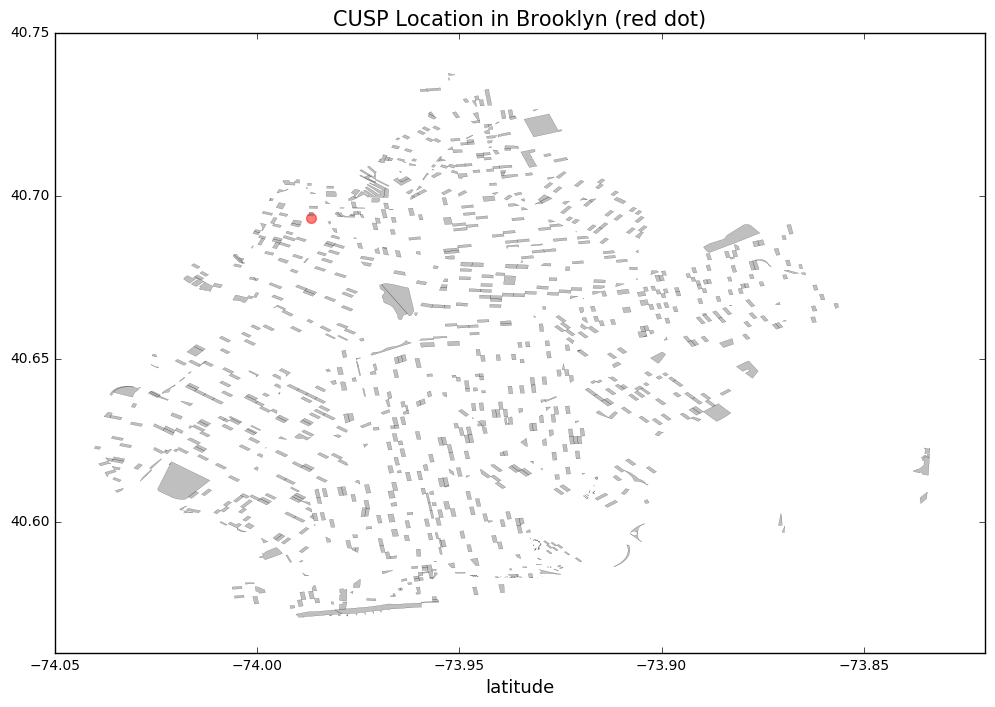

In [18]:
fig, ax = plt.subplots(1, figsize = (12,8))
ct_shape_bk[::10].plot(ax=ax, color = 'grey', linewidth = 0.1)
cusp_ct.T.plot(ax=ax, color = 'red')
plt.scatter(cusp.x, cusp.y, color = 'red', s = 50, alpha = 0.5)
plt.xlim(-74.05, -73.82)
plt.ylim(40.56,40.75)
plt.xlabel('longitude', fontsize = 13)
plt.xlabel('latitude', fontsize = 13)
plt.title('CUSP Location in Brooklyn (red dot)', fontsize = 15)
plt.show()